Task: Measures of central tendency, measures of spread
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Perform following measures, detect and remove outliers using IQR
 Mean Function
Percentile method
IQR(Inter quartile range method)
Normal distribution
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('E:\ML\Task1\house_price.csv')
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


Both 'size' column and 'bhk' column are same. Thats why i dropped one column.

In [57]:
data.drop(['size'], axis=1,inplace=True)
data

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


# Mean

In [58]:
Mean=data["price_per_sqft"].mean().round(2)
print("Mean = ",Mean)

Mean =  7920.34


# Percentile

In [59]:
q1,q2,q3=data.price_per_sqft.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))

25 percentile = 4267.0, 50 percentile = 5438.0, 75 percentile = 7317.0


# IQR

In [60]:
IQR=q3-q1
print("IQR = ",IQR)

IQR =  3050.0


In [61]:
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))

Lower Whisker = -308.0  Upper Whisker = 11892.0


IQR is mainly used to find out the outliers in the dataset. Data which is less than lower whisker or greater than upper whisker comes under outliers.So here 1265 rows of outliers are there.

In [62]:
data[(data["price_per_sqft"]<LW)|(data["price_per_sqft"]>UW)]

,location,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,3300.0,4.0,600.0,4,18181
9,other,1020.0,6.0,370.0,6,36274
22,Thanisandra,2800.0,5.0,380.0,4,13571
45,HSR Layout,600.0,9.0,200.0,8,33333
48,KR Puram,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...
13142,other,1140.0,1.0,185.0,2,16228
13157,other,1400.0,7.0,218.0,7,15571
13185,Hulimavu,500.0,1.0,220.0,1,44000
13186,other,1200.0,5.0,325.0,4,27083


Below is the dataset without outliers.

In [63]:
data[(data["price_per_sqft"]>LW)& (data["price_per_sqft"]<UW)]

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


# Normal distribution

In [64]:
data["price_per_sqft"].describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

Using describe function we can conclude that price_per_sqft is not normally distributed because mean and median is not nearby. In case of a positively skewed frequency distribution, the mean is always greater than median and 
a negatively skewed frequency distribution, the mean is always lesser than median.
Here mean(7920.34) is greater than median(50%-5438.00) .So it is positively skewed.


In [65]:
data["price_per_sqft"].skew()

108.28105529705168

Using skew function also we can find whether it is positively or negatively skewed. Return value of skew is a positive number and greater than 1. That means the data is extremely skewed.

To convert a skewed data distribution to normal distribution we are using "log" function here. After log we again checked the skewness. Now it is lesser number.

In [66]:
data['log_price_per_sqft']=np.log(data["price_per_sqft"])
data['log_price_per_sqft'].skew()

1.3998626551353

Using describe function we can see the mean and median is almost same. That means now it is normally distributed.

In [67]:
data['log_price_per_sqft'].describe()

count    13200.000000
mean         8.679140
std          0.490028
min          5.587249
25%          8.358666
50%          8.601167
75%          8.897956
max         16.300417
Name: log_price_per_sqft, dtype: float64

In [68]:
Mean=data['log_price_per_sqft'].mean()
Mean

8.67914001404239

In [69]:
Std=data["log_price_per_sqft"].std()
Std

0.4900282592757721

In [70]:
Mean-3*Std  #-3sigma

7.209055236215074

In [71]:
Mean+3*Std #3sigma


10.149224791869706

As it is normally distributed the 99.7% data is between mean-3*std and mean+3*std. Rest are the outliers

In [72]:
data[(data["log_price_per_sqft"]>7.2)&(data["log_price_per_sqft"]<10.2)]

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,8.215818
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,8.437067
2,Uttarahalli,1440.0,2.0,62.00,3,4305,8.367532
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,8.739536
4,Kothanur,1200.0,2.0,51.00,2,4250,8.354674
...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,8.808220
13196,other,3600.0,5.0,400.00,4,11111,9.315691
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,8.567506
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,9.250234


Outliers

In [73]:
data[(data["log_price_per_sqft"]<=7.2)|(data["log_price_per_sqft"]>=10.2)]

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
9,other,1020.0,6.0,370.0,6,36274,10.498857
45,HSR Layout,600.0,9.0,200.0,8,33333,10.414303
190,Bellandur,1200.0,5.0,325.0,4,27083,10.206662
345,other,11.0,3.0,74.0,3,672727,13.419095
665,Yelahanka,35000.0,3.0,130.0,3,371,5.916202
...,...,...,...,...,...,...,...
13081,other,8000.0,6.0,2800.0,6,35000,10.463103
13094,other,1200.0,5.0,325.0,4,27083,10.206662
13127,other,1200.0,5.0,325.0,4,27083,10.206662
13185,Hulimavu,500.0,1.0,220.0,1,44000,10.691945


# Z Score

In [74]:
data["zscore"]=(data["log_price_per_sqft"]-Mean)/Std  #z=  x-mean/std
data

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,8.215818,-0.945501
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,8.437067,-0.493998
2,Uttarahalli,1440.0,2.0,62.00,3,4305,8.367532,-0.635897
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,8.739536,0.123251
4,Kothanur,1200.0,2.0,51.00,2,4250,8.354674,-0.662137
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,8.808220,0.263413
13196,other,3600.0,5.0,400.00,4,11111,9.315691,1.299008
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,8.567506,-0.227811
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,9.250234,1.165431


Using z-score we removed the outliers. Any z-score greater than +3 or less than -3 is considered as outlier. Below is the data set without outliers.

In [75]:
data[(data.zscore>-3) & (data.zscore<3)]

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,8.215818,-0.945501
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,8.437067,-0.493998
2,Uttarahalli,1440.0,2.0,62.00,3,4305,8.367532,-0.635897
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,8.739536,0.123251
4,Kothanur,1200.0,2.0,51.00,2,4250,8.354674,-0.662137
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,8.808220,0.263413
13196,other,3600.0,5.0,400.00,4,11111,9.315691,1.299008
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,8.567506,-0.227811
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,9.250234,1.165431


# BoxPlot

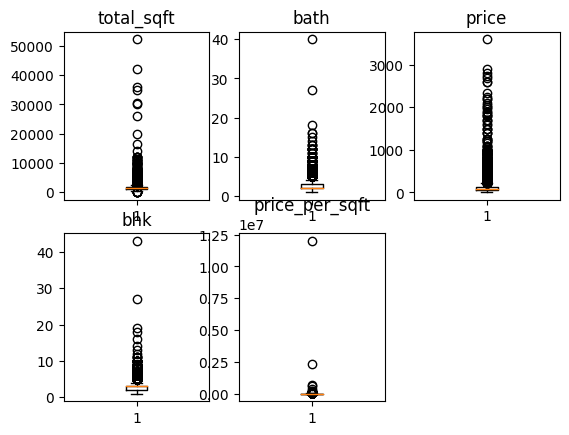

In [76]:

plt.subplot(2, 3, 1)
plt.boxplot(data.total_sqft)
plt.title("total_sqft")

plt.subplot(2, 3, 2)
plt.boxplot(data.bath)
plt.title("bath")

plt.subplot(2, 3, 3)
plt.boxplot(data.price)
plt.title("price")

plt.subplot(2, 3, 4)
plt.boxplot(data.bhk)
plt.title("bhk")

plt.subplot(2, 3, 5)
plt.boxplot(data.price_per_sqft)
plt.title("price_per_sqft")


plt.show()

# Histplot

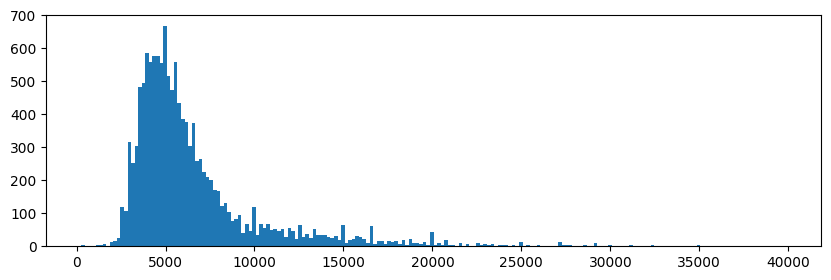

In [77]:
figure = plt.figure(figsize =(10, 3))
Bins=np.arange(267,40000,200)
plt.hist(data.price_per_sqft,bins=Bins)
plt.show()

# HeatMap

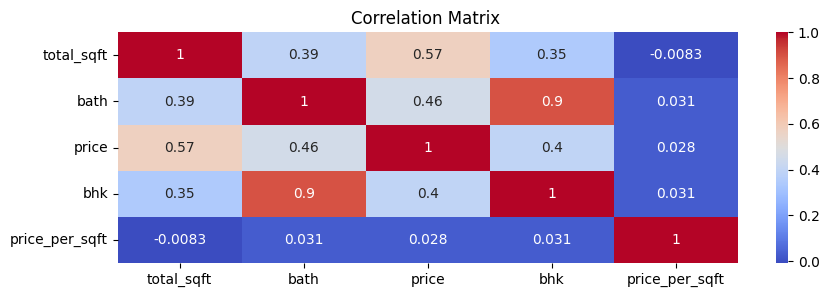

In [78]:
df1=data.drop(['location','log_price_per_sqft','zscore'], axis='columns')
# Compute correlation matrix
corr = df1.corr()
figure = plt.figure(figsize =(10, 3))
# Create heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Add title
plt.title("Correlation Matrix ")

# Show plot
plt.show()

# Pair Plot

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


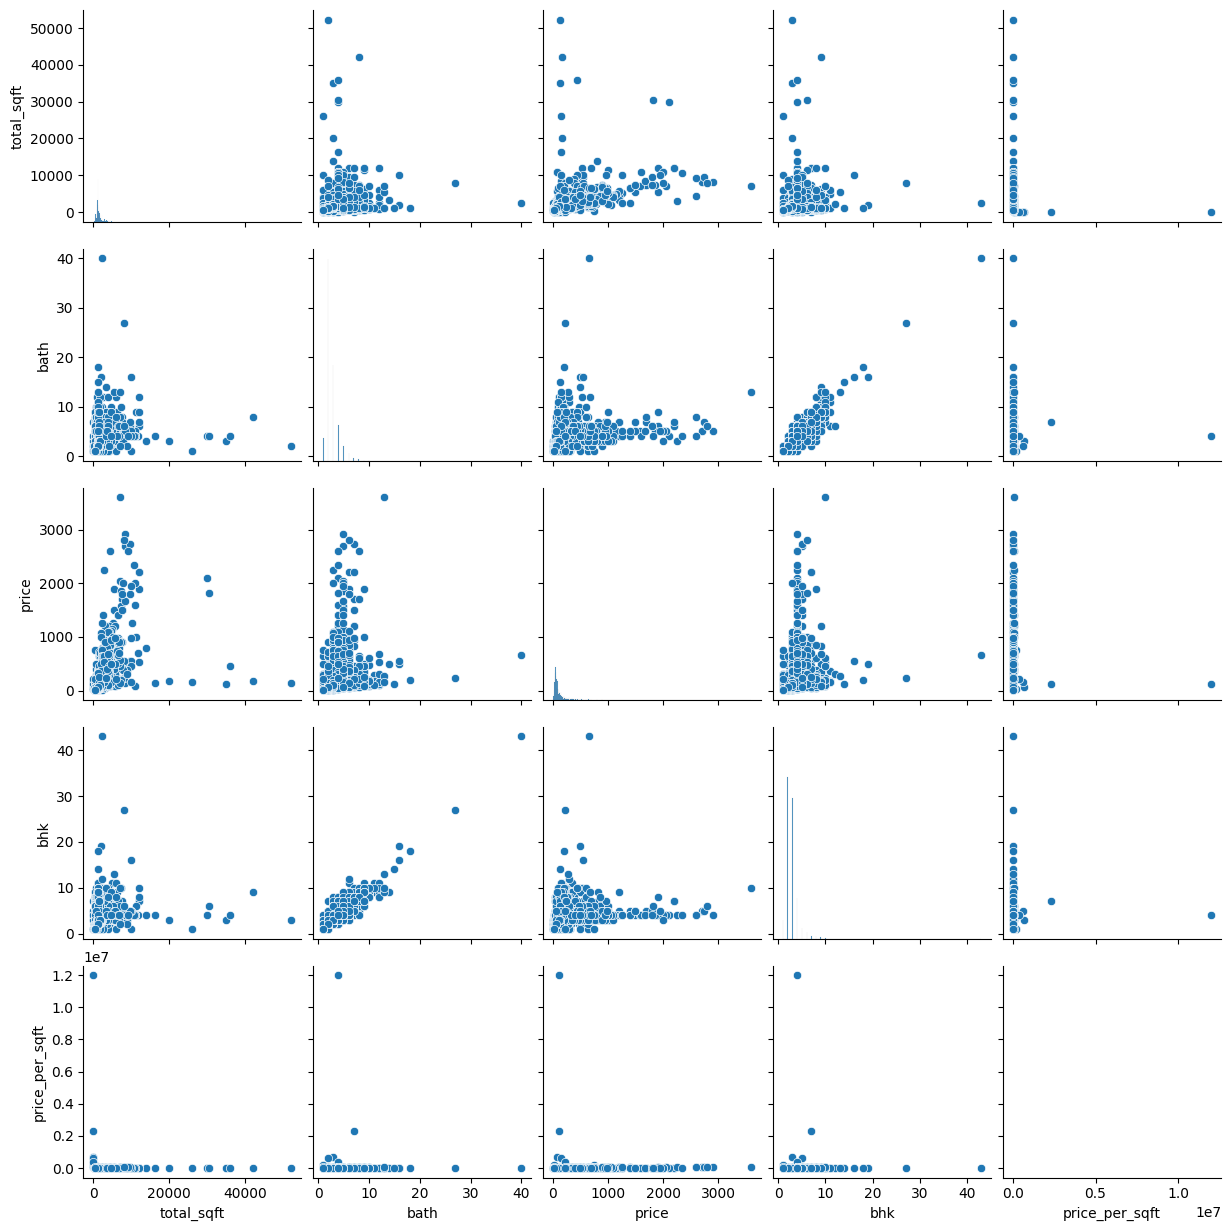

In [79]:
df2=data.drop(['log_price_per_sqft','zscore'], axis='columns')
sns.pairplot(df2, diag_kind='hist')